In [0]:
!pip install -U sklearn
!pip install -U numpy
!pip install -U matplotlib
!pip install -U plotly

In [0]:
import numpy as np
import time
from sklearn.datasets.samples_generator import make_blobs

# Visualization
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import animation, rc
from IPython.display import HTML

# plotly
import plotly
plotly.tools.set_credentials_file(username='DacNguyen', api_key='KRNQwMHIUfVok8sf147j')
import plotly.plotly as py
import plotly.graph_objs as go

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

# Gradient Descent function

In [0]:
# classify X
def f(X, w):
    y_pre = (np.matmul(X, w.T))
    return y_pre
    
def calculate_loss(y, y_pre):
    loss_list = np.array(1 - y*y_pre)
    # When loss_list size is 1 so it is a scala
    if loss_list.size == 1:
        if loss_list < 0:
            return np.array([0])
        else:
            return np.array([loss_list])
        
    loss_list[loss_list < 0] = 0 # max(0, 1 - y[i]*y_pre[i])
    return loss_list

# GRADIENT DESCENT
def gradient_descent(w, X, y, min_diff = 10e-4, alpha = 10e-2,
                     lr = 10e-4, C = 1, epochs = 200):
    # Init loss and weight
    y_pre = f(X, w)
    loss_elements = calculate_loss(y, y_pre)
    new_loss = np.sum(loss_elements) + alpha # init two first loss
    current_loss = new_loss + 2*alpha
    weights = {new_loss: w} # init weight
    iters = 0
    
    while (abs(current_loss-new_loss) > min_diff) and iters < epochs:
        # update loss
        current_loss = new_loss 
        
        # Calculate loss
        y_pre = f(X, weights[current_loss])
        loss_elements = calculate_loss(y, y_pre)
        new_loss = np.sum(loss_elements)
        
        # sum if loss != 0
        available_loss_vector = np.ones(loss_elements.shape[0])
        available_loss_vector[loss_elements == 0] = 0
        
        # update weights by using gradient descent
        if loss_elements.shape[0] != 1:
            hinge_loss = np.matmul((-y.T*available_loss_vector), X)
        else:
            hinge_loss = -y.T*available_loss_vector*X
            
        gra_w = weights[current_loss] + C*hinge_loss 
        weights[new_loss] = weights[current_loss] - lr*gra_w 
        
#         print('{}: Current loss {} with weights {}'
#               .format(iters, current_loss, weights[current_loss]))

        iters += 1 
#         print()
        
    loss_list = list(weights.keys()) # Get loss_list as list
    y_pre = f(X, weights[min(loss_list)])
    return (loss_list, weights, y_pre)

# STOCHASTIC GRADIENT DESCENT
def stochastic_gradient_descent(w, X, y, size=60, lr=10e-4, C=1, epochs=5):
    iters = 0
    weights ={0: w} # init weight
    loss_list = weights.keys()
    
    while iters < epochs:
        iters += 1
        positions = np.random.choice(range(X.shape[0]), size=size, replace=False) # Random without replacement
        current_weight = np.zeros(w.shape[0]) # Total weight of a epoch
        
        # Loop throught some row as a dataset
        for position in positions:
            
            loss_list, weights, y_pre = gradient_descent(weights[min(loss_list)], X[position], y[position])
            current_weight += weights[min(loss_list)]
        weights = {0: current_weight / size} # Prepare new weights for next epoch
    
    loss_list = calculate_loss(y, f(X, weights[0]))
    loss_list = [np.sum(loss_list), np.sum(loss_list) + 1]
    weights = {loss_list[0]: weights[0], loss_list[1]: weights[0]}
    
    return loss_list, weights
        

#2 classes


In [0]:
centers = [(-100, -50), (-10, 10)]
cluster_std = [20, 10]

X, y = make_blobs(n_samples=200000, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)
X -= np.mean(X)
X = np.append(X, np.ones((X.shape[0], 1)), axis = 1) # add bias at last
y[y == 0] = -1

w = np.array([0.01, 0.01, 0.01]) # add bias at last (column vector)

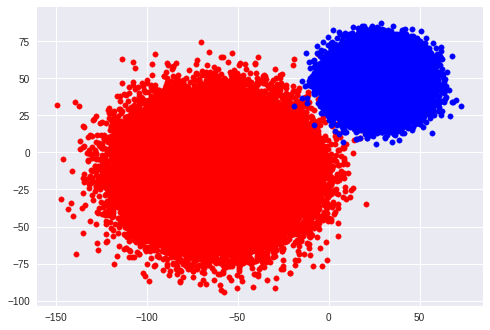

In [0]:
plt.scatter(X[y == -1, 0], X[y == -1, 1], color="red", s=30, label="Cluster1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", s=30, label="Cluster2")

## Gradient Descent

### Stochastic 

In [0]:
start_time = time.time()
loss_list_sgd, weights_sgd = stochastic_gradient_descent(w, X, y, epochs = 1, size=1000)
end_time = time.time()
time_comsuming_sgd = end_time - start_time
print(min(loss_list_sgd), weights_sgd[min(weights_sgd)], end_time - start_time)

411.6184536213169 [0.06694154 0.03040837 0.00306567] 0.1560986042022705


### Batch

In [0]:
start_time = time.time()
loss_list, weights, y_pre = gradient_descent(w, X, y, lr = 0.000001, epochs=50, min_diff=0)
end_time = time.time()
time_comsuming_gd = end_time - start_time
print(min(loss_list), weights[min(loss_list)], end_time - start_time)

8786.616495336997 [7.42731143 4.92687394 0.01459706] 0.20004844665527344


## Visualization

Text(0, 0.5, 'Time Consuming')

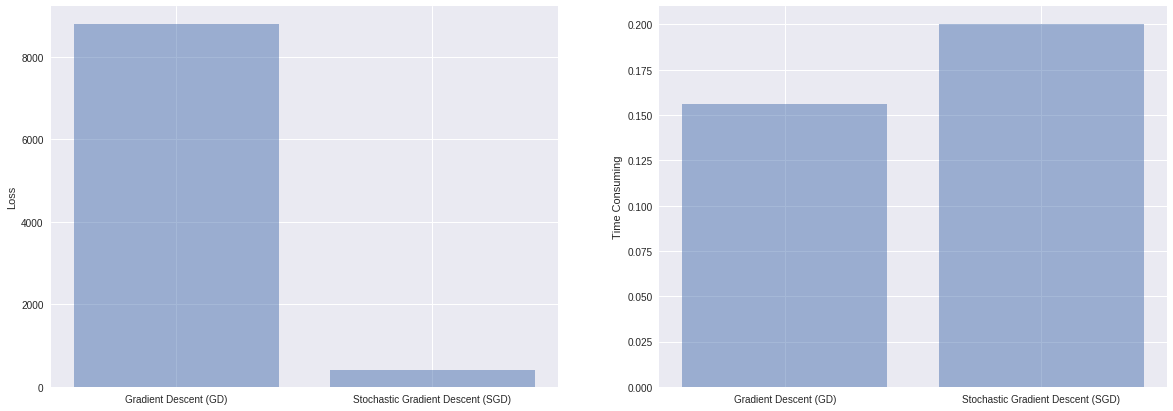

In [0]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

ax[0].bar(['Gradient Descent (GD)', 'Stochastic Gradient Descent (SGD)'], [min(loss_list), min(loss_list_sgd)], align='center', alpha=0.5)
ax[0].set_ylabel('Loss')

ax[1].bar(['Gradient Descent (GD)', 'Stochastic Gradient Descent (SGD)'], [time_comsuming_sgd, time_comsuming_gd], align='center', alpha=0.5)
ax[1].set_ylabel('Time Consuming')


In [0]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

'''LOSS VISUALIZATION'''
ax[0].plot(loss_list)

# Moving point initiation
point, = ax[0].plot(0,0, 'ro')
point.set_data([],[])

def init_loss_point():
    ax[0].set_xlabel('$No. Epoch$')
    ax[0].set_ylabel('$Loss$')
    point.set_data(min(loss_list), max(loss_list))
    return point
    
def animate_loss_point(i):
    point.set_data(i,loss_list[i])
    return point


'''Line Visualization'''
def compute_x1(w, x2):
    return (-w[1] * x2 - w[2])/w[0]
def compute_y(w, x1, x2):
    return w[0]*x1 + w[1]*x2 + w[2]
## Initiation ##
ax[1].plot(X[y == -1, 0], X[y == -1, 1], 'ro', alpha=0.8)
ax[1].plot(X[y == 1, 0], X[y == 1, 1], 'bo', alpha=0.8)
ax[1].set_xlabel('$x_1$')
ax[1].set_ylabel('$x_2$')
x2_min, x2_max = ax[1].get_ybound()

# Animating line
line, = ax[1].plot([0, 0], [0, 0], color='black', lw=5.0, alpha=0.5)
# Functions
def init_line():
    # Draw first line
    x1_min = compute_x1(weights[loss_list[0]], x2_min)
    x1_max = compute_x1(weights[loss_list[0]], x2_max)
    first_line = ax[1].plot([x1_min, x1_max], [x2_min, x2_max], color='orange', lw=5.0, alpha=0.5, label='Init Line')
       
    # Draw best line
    x1_min = compute_x1(weights[min(loss_list)], x2_min)
    x1_max = compute_x1(weights[min(loss_list)], x2_max)
    best_line = ax[1].plot([x1_min, x1_max], [x2_min, x2_max], color='green', lw=5.0, alpha=0.7, label='GD line')
    
    # SGD line
    x1_min = compute_x1(weights_sgd[min(loss_list_sgd)], x2_min)
    x1_max = compute_x1(weights_sgd[min(loss_list_sgd)], x2_max)
    sgd_line = ax[1].plot([x1_min, x1_max], [x2_min, x2_max], color='violet', lw=5.0, alpha=0.7, label='SGD line')

    return line,

def animate_line(i):
    x1_min = compute_x1(weights[loss_list[i]], x2_min)
    x1_max = compute_x1(weights[loss_list[i]], x2_max)
    line.set_data([x1_min, x1_max], [x2_min, x2_max])
    return line,

'''MAIN VISUALIZATION'''
def init():
    point = init_loss_point()
    line, = init_line()
    return point, line, 

def animate(i):
    point = animate_loss_point(i)
    line, = animate_line(i)
    return point, line, 

plt.close()
rc('animation', html='jshtml')
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(loss_list)-1, interval=len(loss_list)-1)
ani

# 2 classes - 3 features

In [0]:
centers_3d = [(9, 9, 9), (3, 3, 3)]
cluster_std_3d = [4, 2]

X_3d, y_3d = make_blobs(n_samples=150, cluster_std=cluster_std_3d, centers=centers_3d, n_features=3, random_state=1)
X_3d -= np.mean(X_3d)
X_3d = np.append(X_3d, np.ones((len(X_3d), 1)), axis = 1) # add bias at last


## Gradient Descent

In [0]:
# init weight
w_3d = np.array([0.01, 0.01, 0.01, 0.01]) # add bias at last (column vector)
loss_list, weights, y_pre = gradient_descent(w_3d, X_3d, y_3d, lr = 0.001, epochs=250) # Get weights from previous as an init weight

## Visualization

In [0]:
def compute_x3_3d(x1, x2, w):
    x3 = np.zeros((x1.size, x2.size))
    for i in range(0, x1.size):
        for j in range(0, x2.size):
            x3[i, j] = -(w[0]*x1[i] + w[1]*x2[j])/w[2]
    return x3

In [0]:
x1_3d_min, x1_3d_max = [min(X_3d[:, 0]), max(X_3d[:, 0])]
x2_3d_min, x2_3d_max = [min(X_3d[:, 1]), max(X_3d[:, 1])]
x3_3d_min, x3_3d_max = [min(X_3d[:, 2]), max(X_3d[:, 2])]

x1_3d = np.linspace(x1_3d_min, x1_3d_max, num=50)
x2_3d = np.linspace(x2_3d_min, x2_3d_max, num=50)
x3_3d = compute_x3_3d(x1_3d, x2_3d, weights[min(loss_list)])


### Plotly

Generate x1, x2, x3 to draw hyperplane

In [0]:
trace1 = go.Scatter3d(
    x=X_3d[y_3d == 0, 0],
    y=X_3d[y_3d == 0, 1],
    z=X_3d[y_3d == 0, 2],
    mode='markers',
    marker=dict(
#         size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=1
        ),
#         opacity=0.8
    )
)

trace2 = go.Scatter3d(
    x=X_3d[y_3d == 1, 0],
    y=X_3d[y_3d == 1, 1],
    z=X_3d[y_3d == 1, 2],
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
    )
)

data = [trace1, trace2] # Data without hyperplane

# Rotate camera to the hyperplane
camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.5, y=-1.5, z=0.1)
)

# layout
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene=dict(
        camera = camera,
        xaxis=dict(
            title='X1',
            backgroundcolor="rgb(200, 200, 230)",
            range=[x1_3d_min - 1/10*abs(x1_3d_min), x1_3d_max + 1/10*abs(x1_3d_min)],
            autorange=False, zeroline=False
        ),
        yaxis=dict(
            title='X2',
            backgroundcolor="rgb(230, 200,230)",
            range=[x2_3d_min - 1/10*abs(x2_3d_min), x2_3d_max + 1/10*abs(x2_3d_min)],
            autorange=False, zeroline=False
        ),
        zaxis=dict(
            title='X3',
            backgroundcolor="rgb(230, 230,200)",
#             gridcolor="rgb(255, 255, 255)",
#             showbackground=True,
            range=[x3_3d_min - 1/10*abs(x3_3d_min), x3_3d_max + 1/10*abs(x3_3d_min)],
            autorange=False, zeroline=False
        )
    ),
    updatemenus=[{'type': 'buttons',
                           'buttons': [{'label': 'Play',
                                        'method': 'animate',
                                        'args': [None]}]}]
)


In [0]:
plane = go.Surface(
    x=x1_3d,
    y=x2_3d,
    z=x3_3d,
    opacity = 0.75,
    colorscale='Viridis'
)

data = [trace1, trace2, plane]

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

In [0]:
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

configure_plotly_browser_state()
init_notebook_mode(connected=False)

# loss lines
data_line=[
    dict(y=loss_list,
           mode='lines', 
           line=dict(width=2, color='blue')
          ),
     dict(y=loss_list,
           mode='lines', 
           line=dict(width=2, color='blue')
          )
]
# layout
layout_line=dict(xaxis=dict(range=[0, len(loss_list)], autorange=False, zeroline=False),
            yaxis=dict(range=[min(loss_list) - 1/10*min(loss_list), max(loss_list) + 1/10*min(loss_list)], autorange=False, zeroline=False),
            updatemenus=[{'type': 'buttons',
                           'buttons': [{'label': 'Play',
                                        'method': 'animate',
                                        'args': [None]}]}])
# Moving point
frames_line=[dict(
    data=[dict(
        x=[k], 
        y=[loss_list[k]], 
        mode='markers', 
        marker=dict(color='red', size=10)
    )]) for k in range(0, len(loss_list))]    

figure_line = dict(data=data_line, layout=layout_line, frames=frames_line)         
iplot(figure_line)

In [0]:
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# Moving hyperplane
frames_hyperplane=[
    dict(data=[go.Surface(
        x=x1_3d,
        y=x2_3d,
        z=compute_x3_3d(x1_3d, x2_3d, weights[loss_list[k]]),
        opacity = 0.75,
#         colorscale='Viridis'
    )]) for k in range(0, len(loss_list))]    


data = [trace1, trace2, plane, trace1, trace2, plane]

figure_hyperplane = go.Figure(data=data, layout=layout, frames=frames_hyperplane)
iplot(figure_hyperplane, filename='gd-moving-plane')